### 02 Exercises 

In [2]:
# Import libraries 
import torch 
from torch import nn 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

### 1. Binary Classification (make moons) 

In [3]:
# Make data 
X, y = make_moons(n_samples=1000, random_state=42)

X[:10], y[:10]

(array([[ 0.00872719,  0.36817352],
        [ 0.921384  , -0.49690497],
        [ 0.94022577, -0.49821192],
        [ 0.46587532, -0.34540571],
        [-0.85041204,  0.52611726],
        [ 0.56490116, -0.4003827 ],
        [ 0.29847979, -0.21264956],
        [ 0.00334744,  0.41824625],
        [ 1.63606473, -0.27163571],
        [ 0.65529317,  0.75537465]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64))

In [4]:
np.unique(y) 

array([0, 1], dtype=int64)

Only 0s and 1s means binary classification 

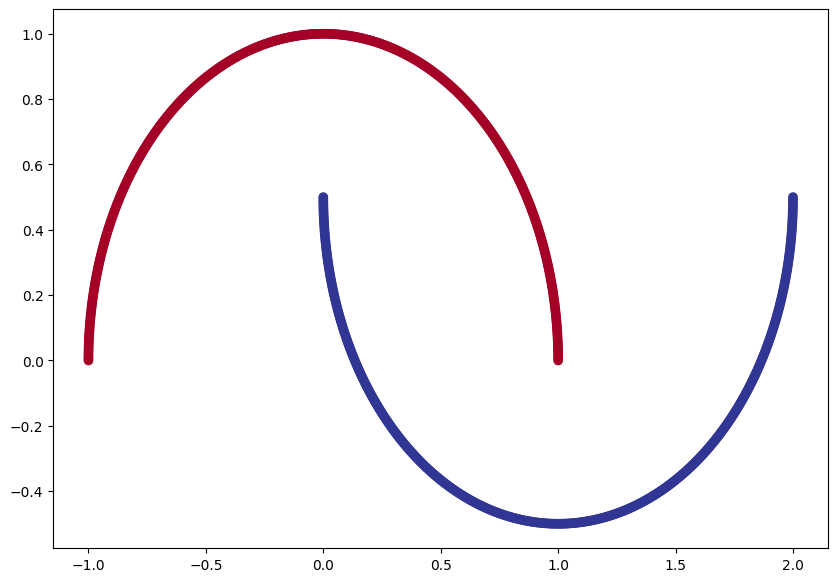

In [5]:
# Visualize 
plt.figure(figsize=(10, 7)) 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [6]:
# Turn data in tensors 
X = torch.from_numpy(X).type(torch.float) 
y = torch.from_numpy(y).type(torch.float) 

X[:5], y[:5]

(tensor([[ 0.0087,  0.3682],
         [ 0.9214, -0.4969],
         [ 0.9402, -0.4982],
         [ 0.4659, -0.3454],
         [-0.8504,  0.5261]]),
 tensor([1., 1., 1., 1., 0.]))

In [10]:
# Create train/test splits 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

len(X_train), len(y_train), len(X_test), len(y_test) 

(800, 800, 200, 200)

In [11]:
# Set device agnostic code 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [12]:
# Build model 
class MoonModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1) 
        self.relu = nn.ReLU() 

    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
moon_model = MoonModel().to(device)
moon_model

MoonModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [14]:
device, next(moon_model.parameters()).device

('cuda', device(type='cuda', index=0))

In [13]:
# Loss function & optimizer 
loss_fn = nn.BCEWithLogitsLoss() 
optimizer = torch.optim.Adam(moon_model.parameters(), lr=0.01) 

In [24]:
def accuracy_fn(y_true, y_pred): 
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100 
    return acc 

In [27]:
torch.manual_seed(42) 
torch.cuda.manual_seed(42) 

X_train, y_train  = X_train.to(device), y_train.to(device) 
X_test, y_test = X_test.to(device), y_test.to(device) 

epochs = 200 

for epoch in range(epochs):
    # Train
    moon_model.train() 
    train_logits = moon_model(X_train).squeeze()
    train_preds = torch.round(torch.sigmoid(train_logits)) 
    train_loss = loss_fn(train_logits, y_train) 
    train_acc = accuracy_fn(y_train, train_preds)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step() 

    # Test 
    moon_model.eval() 
    with torch.inference_mode():
        test_logits = moon_model(X_test).squeeze() 
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test) 
        test_acc = accuracy_fn(y_test, test_preds) 
    
    # Print whats happenin 
    if epoch % 10 == 0: 
        print(f"Epoch: {epoch} | Train loss: {train_loss}, Train acc: {train_acc} | Test loss: {test_loss}, Test acc {test_acc}")


Epoch: 0 | Train loss: 0.7050350904464722, Train acc: 44.0 | Test loss: 0.69231116771698, Test acc 50.0
Epoch: 10 | Train loss: 0.5881993174552917, Train acc: 82.0 | Test loss: 0.582787036895752, Test acc 82.0
Epoch: 20 | Train loss: 0.4425576627254486, Train acc: 82.75 | Test loss: 0.45165756344795227, Test acc 82.0
Epoch: 30 | Train loss: 0.3247493803501129, Train acc: 85.25 | Test loss: 0.329824298620224, Test acc 87.0
Epoch: 40 | Train loss: 0.24581672251224518, Train acc: 88.25 | Test loss: 0.24760112166404724, Test acc 89.5
Epoch: 50 | Train loss: 0.2022983878850937, Train acc: 90.875 | Test loss: 0.20652325451374054, Test acc 91.5
Epoch: 60 | Train loss: 0.17719250917434692, Train acc: 92.0 | Test loss: 0.18470464646816254, Test acc 91.0
Epoch: 70 | Train loss: 0.15662364661693573, Train acc: 92.875 | Test loss: 0.16478462517261505, Test acc 92.5
Epoch: 80 | Train loss: 0.1341380625963211, Train acc: 94.5 | Test loss: 0.14217321574687958, Test acc 93.0
Epoch: 90 | Train loss: 0.

In [28]:
import requests
from pathlib import Path

# Download helper functions (if not already downloaded) 
if Path("helper_functions.py").is_file():
    print("Already exists, skipping download")
else: 
    print("Downloading helper_functions.py") 
    requests = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py") 
    with open("helper_functions.py", "wb") as f: 
        f.write(requests.content) 

In [29]:
# Make predictions 
moon_model.eval()
with torch.inference_mode():
    y_logits = moon_model(X_test).squeeze() 
    y_preds = torch.round(torch.sigmoid(y_logits)) 

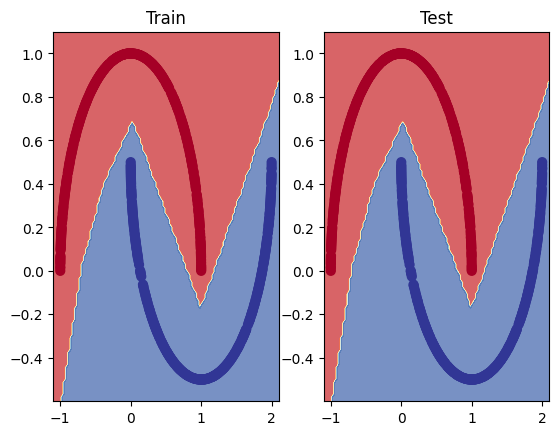

In [30]:
from helper_functions import plot_decision_boundary
plt.subplot(1, 2, 1) 
plt.title("Train")
plot_decision_boundary(moon_model, X_train, y_train) 
plt.subplot(1, 2, 2) 
plt.title("Test") 
plot_decision_boundary(moon_model, X_train, y_train); 

### 2. Replicate Tanh function 

In [35]:
input_data = torch.randn(10) 
input_data

tensor([ 0.2303, -1.1229, -0.1863,  2.2082, -0.6380,  0.4617,  0.2674,  0.5349,
         0.8094,  1.1103])

In [36]:
torch.tanh(input_data)

tensor([ 0.2263, -0.8086, -0.1842,  0.9761, -0.5635,  0.4314,  0.2612,  0.4891,
         0.6692,  0.8042])

In [39]:
def tanh(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

In [41]:
tanh(input_data) 

tensor([ 0.2263, -0.8086, -0.1842,  0.9761, -0.5635,  0.4314,  0.2612,  0.4891,
         0.6692,  0.8042])

### 3. Multi-class dataset (spiral dataset) 

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

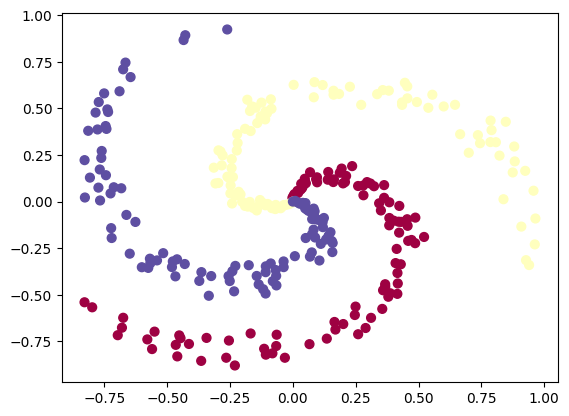

In [4]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [5]:
X[:5], y[:5]

(array([[-0.        ,  0.        ],
        [ 0.00106597,  0.01004461],
        [-0.00197622,  0.02010513],
        [ 0.00202438,  0.03023534],
        [ 0.00610187,  0.03994063]]),
 array([0, 0, 0, 0, 0], dtype=uint8))

In [6]:
np.unique(y)

array([0, 1, 2], dtype=uint8)

3 labels --> multi class classification 

In [7]:
X = torch.from_numpy(X).type(torch.float) 
y = torch.from_numpy(y).type(torch.LongTensor) 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
len(X_train), len(y_train), len(X_test), len(y_test) 

(240, 240, 60, 60)

In [13]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() 
    return (correct / len(y_pred)) * 100 

In [10]:
class SpiralModel(nn.Module):
    def __init__(self):
        super().__init__() 

        self.sequential_stack = nn.Sequential(
            nn.Linear(in_features=2, out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10, out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10, out_features=3) 
        )
    
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.sequential_stack(x) 

spiral_model = SpiralModel().to(device) 
spiral_model


SpiralModel(
  (sequential_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=3, bias=True)
  )
)

In [11]:
# Loss function & optimizer 
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(spiral_model.parameters(), lr=0.01)

In [14]:
torch.manual_seed(42) 
torch.cuda.manual_seed(42) 

epochs = 200 

X_train, y_train = X_train.to(device), y_train.to(device) 
X_test, y_test = X_test.to(device), y_test.to(device) 

for epoch in range(epochs):
    # Training

    spiral_model.train() 
    train_logits = spiral_model(X_train) 
    train_preds = torch.softmax(train_logits, dim=1).argmax(dim=1) 
    train_loss = loss_fn(train_logits, y_train) 
    train_acc = accuracy_fn(y_train, train_preds) 
    optimizer.zero_grad()
    train_loss.backward() 
    optimizer.step() 

    # Testing 
    spiral_model.eval() 
    with torch.inference_mode():
        test_logits = spiral_model(X_test) 
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1) 
        test_loss = loss_fn(test_logits, y_test) 
        test_acc = accuracy_fn(y_test, test_preds) 
    
    # Print whats happenin 
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train loss: {train_loss:.4f}, Train acc: {train_acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Train loss: 1.1380, Train acc: 35.00% | Test loss: 1.1699, Test acc: 26.67%
Epoch: 10 | Train loss: 1.0945, Train acc: 35.00% | Test loss: 1.1094, Test acc: 26.67%
Epoch: 20 | Train loss: 1.0608, Train acc: 52.92% | Test loss: 1.0653, Test acc: 50.00%
Epoch: 30 | Train loss: 0.9824, Train acc: 59.17% | Test loss: 0.9836, Test acc: 51.67%
Epoch: 40 | Train loss: 0.8571, Train acc: 58.75% | Test loss: 0.8619, Test acc: 53.33%
Epoch: 50 | Train loss: 0.7483, Train acc: 56.25% | Test loss: 0.7807, Test acc: 55.00%
Epoch: 60 | Train loss: 0.6904, Train acc: 56.25% | Test loss: 0.7495, Test acc: 51.67%
Epoch: 70 | Train loss: 0.6493, Train acc: 58.75% | Test loss: 0.7172, Test acc: 53.33%
Epoch: 80 | Train loss: 0.5962, Train acc: 62.50% | Test loss: 0.6609, Test acc: 53.33%
Epoch: 90 | Train loss: 0.5337, Train acc: 68.33% | Test loss: 0.5932, Test acc: 60.00%
Epoch: 100 | Train loss: 0.4706, Train acc: 73.75% | Test loss: 0.5287, Test acc: 65.00%
Epoch: 110 | Train loss: 0.4067,

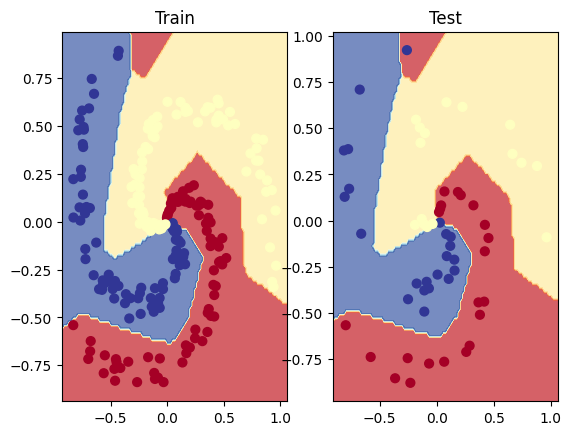

In [15]:
from helper_functions import plot_decision_boundary
plt.subplot(1, 2, 1) 
plt.title("Train") 
plot_decision_boundary(spiral_model, X_train, y_train) 
plt.subplot(1, 2, 2) 
plt.title("Test") 
plot_decision_boundary(spiral_model, X_test, y_test) 